In [1]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [2]:
#sbin=pd.read_csv('bitcoin.csv')
sbin=pd.read_csv('CSI_100.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head(-10))
print(sbin.info())



           Date    Close      Open      High       Low Vol. Change %
0     8/28/2024  1550.71  1,566.24  1,566.89  1,547.47  NaN   -1.13%
1     8/27/2024  1568.44  1,550.53  1,568.91  1,547.13  NaN    0.31%
2     8/26/2024  1563.54  1,555.36  1,566.55  1,555.36  NaN    1.06%
3     8/23/2024  1547.10  1,539.47  1,549.04  1,535.78  NaN   -0.34%
4     8/22/2024  1552.41  1,540.77  1,553.29  1,529.96  NaN    1.45%
...         ...      ...       ...       ...       ...  ...      ...
3308   9/2/2011  1685.18  1,714.16  1,714.87  1,683.83  NaN   -1.73%
3309   9/1/2011  1714.84  1,731.06  1,749.47  1,713.74  NaN    0.33%
3310  8/31/2011  1709.22  1,685.17  1,710.36  1,678.35  NaN    1.74%
3311  8/30/2011  1679.95  1,677.96  1,693.02  1,669.42  NaN    1.80%
3312  8/29/2011  1650.25  1,651.95  1,654.58  1,639.22  NaN    1.52%

[3313 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
--

In [3]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3323 non-null   datetime64[ns]
 1   Close     3323 non-null   float64       
 2   Open      3323 non-null   object        
 3   High      3323 non-null   object        
 4   Low       3323 non-null   object        
 5   Vol.      1935 non-null   object        
 6   Change %  3323 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 181.9+ KB
None


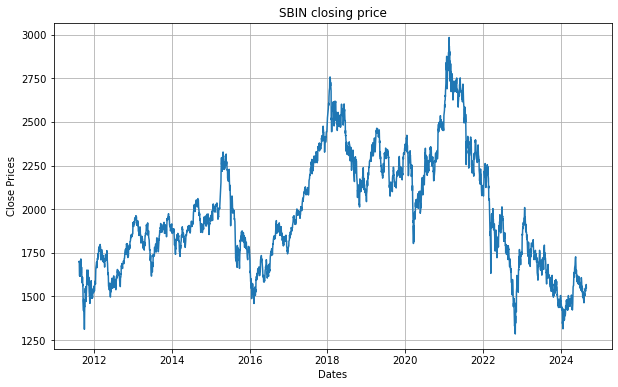

In [4]:
# Plotting Time data

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [5]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date    Close      Open      High       Low Vol. Change %
3322 2011-08-15  1699.07  1,677.47  1,699.24  1,669.82  NaN    3.34%
3321 2011-08-16  1697.10  1,708.26  1,717.38  1,691.54  NaN   -0.12%
3320 2011-08-17  1701.79  1,705.37  1,719.45  1,695.79  NaN    0.28%
3319 2011-08-18  1676.51  1,700.83  1,706.99  1,672.00  NaN   -1.49%
3318 2011-08-19  1619.65  1,629.89  1,636.33  1,612.90  NaN   -3.39%
(3323, 7)
        Date    Close      Open      High       Low Vol. Change %
0 2011-08-15  1699.07  1,677.47  1,699.24  1,669.82  NaN    3.34%
1 2011-08-16   1697.1  1,708.26  1,717.38  1,691.54  NaN   -0.12%
2 2011-08-17  1701.79  1,705.37  1,719.45  1,695.79  NaN    0.28%
3 2011-08-18  1676.51  1,700.83  1,706.99  1,672.00  NaN   -1.49%
4 2011-08-19  1619.65  1,629.89  1,636.33  1,612.90  NaN   -3.39%


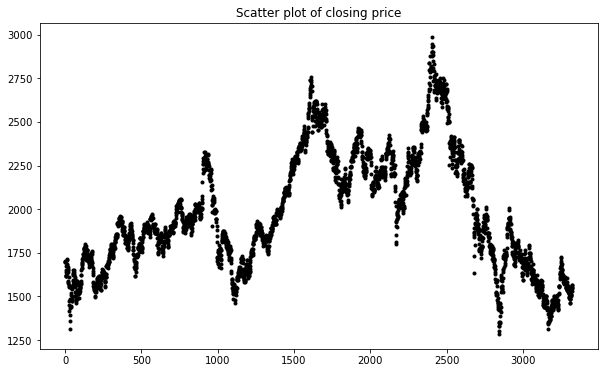

In [6]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(10,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [7]:
print(df1.describe())

             Close
count  3323.000000
mean   1978.516780
std     332.754912
min    1285.160000
25%    1725.080000
50%    1913.890000
75%    2240.755000
max    2983.260000


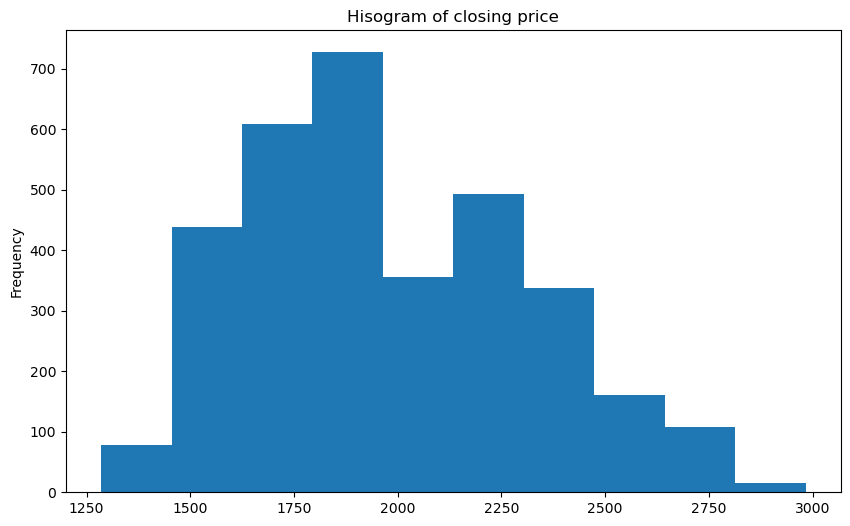

In [12]:
# Histogram of Closing Price of BitCoin

plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

Neural Network

In [13]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

plt.style.use('fivethirtyeight')

In [22]:
# Selecting data points as the paper

#idxs=df2.index[df2['Date']=='2011-01-06'].values
idxs=df2.index[df2['Date']=='2014-04-10'].values

#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2023-04-20'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


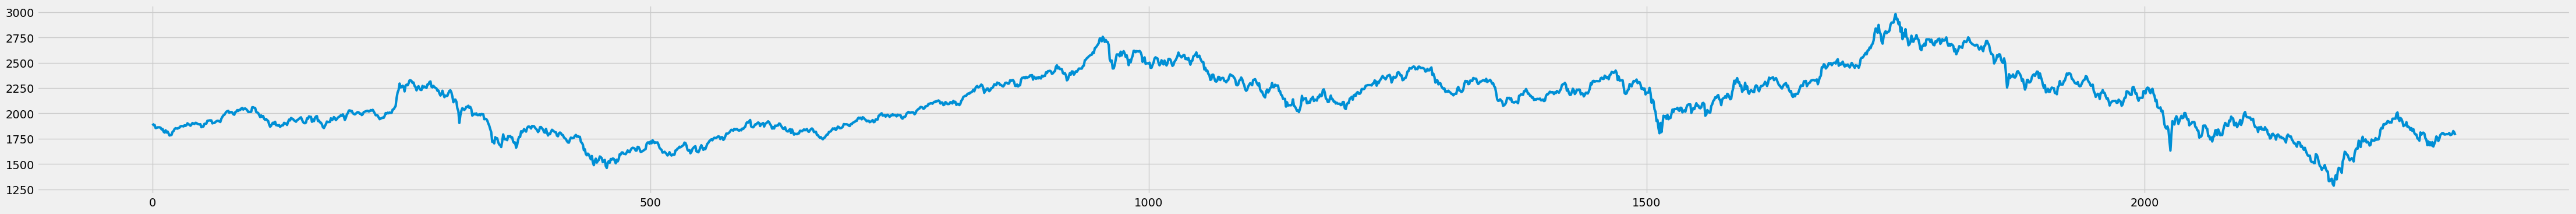

In [70]:
plt.figure(figsize=(50,4))
plt.plot(dataset, linewidth=3, )

In [23]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [46]:
# Create the training dataset


training_data_len=math.ceil(len(dataset)* 0.8095)
print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

1873


In [47]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(1813, 60)
(440, 60)


In [48]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(1813, 60, 1)
(440, 60, 1)


# Model Create and train 

In [65]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
#x = LSTM(30, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
#x = LSTM(20, return_sequences = False)(x)
x = LSTM(60, return_sequences = False)(x)
#x = Reshape((20,1))(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=120, num_heads=5, ff_dim=5, dropout=0.15)
#x = transformer_encoder(x, head_size=15, num_heads=4, ff_dim=4, dropout=0.15)

x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
#x = Dense(50, activation="relu")(x)
#x = Dropout(0.1)(x)

x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


history=model.fit(x_train, y_train,  epochs=12, use_multiprocessing=True, workers=12, batch_size=1, verbose=1)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 60, 60)       14880       ['input_2[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 60)           29040       ['lstm_2[0][0]']                 
                                                                                                  
 reshape_1 (Reshape)            (None, 60, 1)        0           ['lstm_3[0][0]']                 
                                                                                            

In [ ]:
## Only Dense Model 


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


model=Sequential()
model.add(Dense(80, input_shape = (60,1)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

model.summary()
#from sklearn.metrics import classification_report, confusion_matrix

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mse'])

In [62]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=2, use_multiprocessing=True, workers=12)



Epoch 1/2
1813/1813 [==============================] - 22s 12ms/step - loss: 6.5006e-04
Epoch 2/2
1813/1813 [==============================] - 21s 12ms/step - loss: 6.5582e-04


In [63]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



14/14 [==============================] - 0s 26ms/step
(440, 1)


In [64]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 52.87528950378187
Mean Squared Error (MSE): 2795.796240108747
Root-Mean Squared Error (RMSE): 52.875289503781886
Mean Absolute Error (MAE): 39.676427379261355
R2 Score: 0.9590766562339935
Explained Variance Score: 0.9637768958388787
Mean Absolute Percentage Error (MAPE): 2.1959066084113124
Mean Percentage Error (MPE): 0.7391988941226952


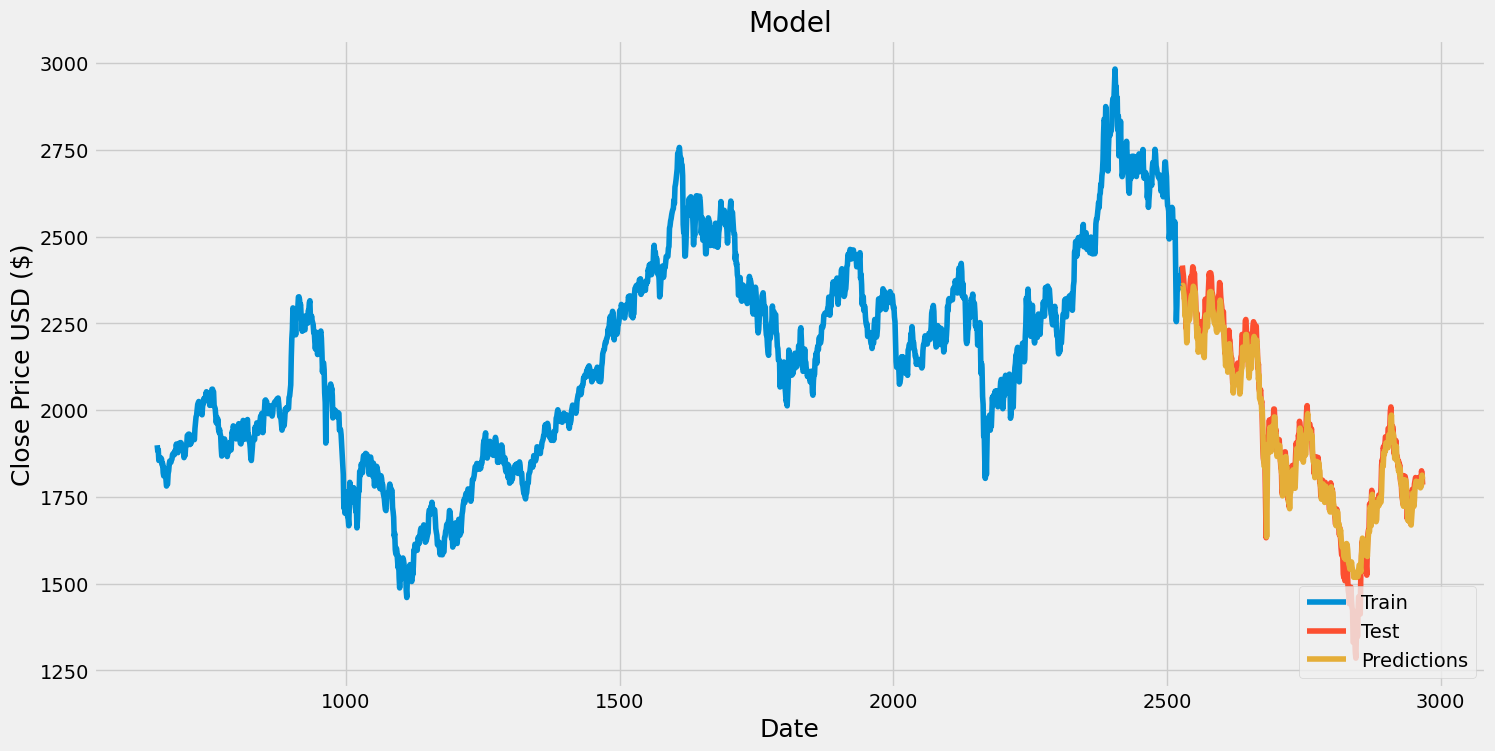

In [52]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

50.95289857877937


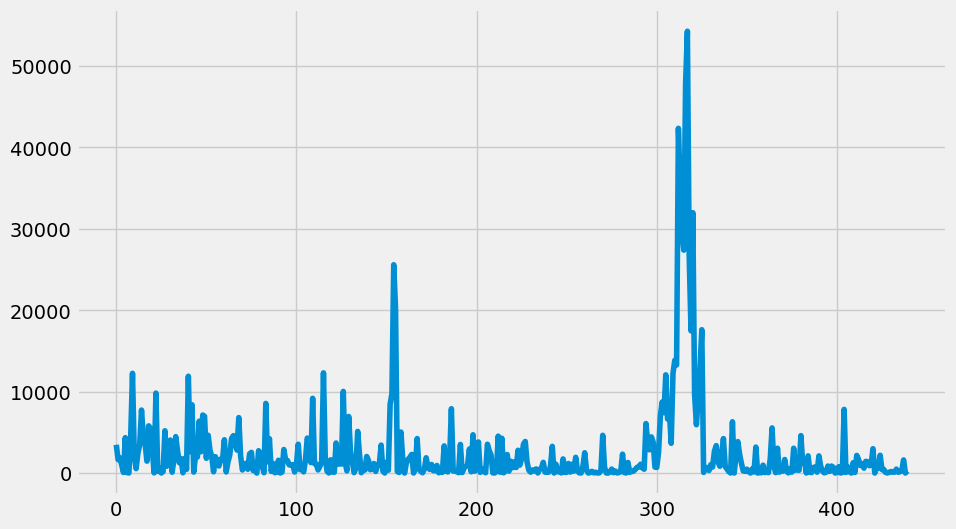

In [53]:
error=((y_test-predictions)**2)
plt.plot(error)

print(np.sqrt(np.sum(error)/len(error)))

In [30]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

NameError: name 'keras' is not defined

# Model and session save

In [54]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("LSTMTransDense_CSI_100_50.95_IRMSE.keras")

filename = 'globalsave_LSTMTransDense_CSI_100_50.95_IRMSE.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

INFO:tensorflow:Assets written to: ram://453e33e9-0f66-4889-8a7e-06645dc27dbb/assets


INFO:tensorflow:Assets written to: ram://453e33e9-0f66-4889-8a7e-06645dc27dbb/assets


TypeError: cannot pickle 'tensorflow.python.framework._pywrap_python_api_dispatcher.PythonAPIDispatcher' object

In [55]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "LSTMTransDense_CSI_100_50.95_IRMSE.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://ca92caba-cef2-4b9b-81de-ef644a18be26/assets


INFO:tensorflow:Assets written to: ram://ca92caba-cef2-4b9b-81de-ef644a18be26/assets


# Saved Model Load from Disk

In [56]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("LSTMTransDense_CSI_100_50.95_IRMSE.keras")

# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


14/14 [==============================] - 0s 24ms/step


In [57]:
import pickle

model_pkl_file = "LSTMTransDense_CSI_100_50.95_IRMSE.pkl" 

with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://435beea1-258a-4605-910d-54e24f292d6b/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [58]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 60, 60)       14880       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 60)           29040       ['lstm[0][0]']                   
                                                                                                  
 reshape (Reshape)              (None, 60, 1)        0           ['lstm_1[0][0]']                 
                                                                                              

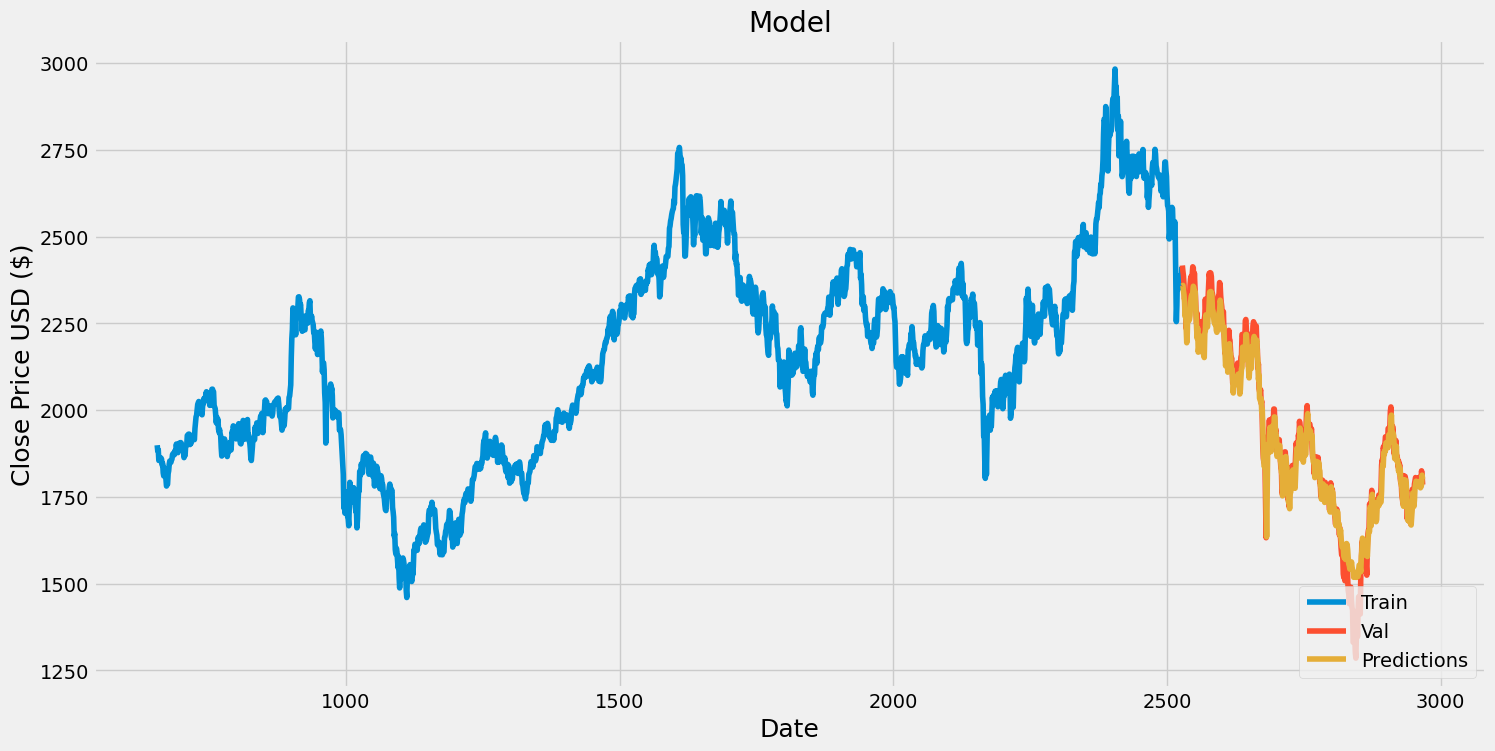

In [59]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

In [40]:
##############################  TEST #######################


data_new=dataT[3674:]
print(data_new.shape)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    

#print(x_test)
#print(y_test)


(4415, 1)
[[0.        ]
 [0.00085406]
 [0.00177861]
 ...
 [0.33476952]
 [0.34286894]
 [0.35016064]]
(4355, 60)


In [41]:
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



137/137 [==============================] - 1s 5ms/step
(4355, 1)


In [42]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values, predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values, predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 8229.15877496496
Root-Mean Squared Error (RMSE): 90.71471090713436
Mean Absolute Error (MAE): 71.74078110424439
R2 Score: 0.983287971932333
Explained Variance Score: 0.9912581548544676
Mean Absolute Percentage Error (MAPE): 101.29260654512046
Mean Percentage Error (MPE): 101.29260654512046


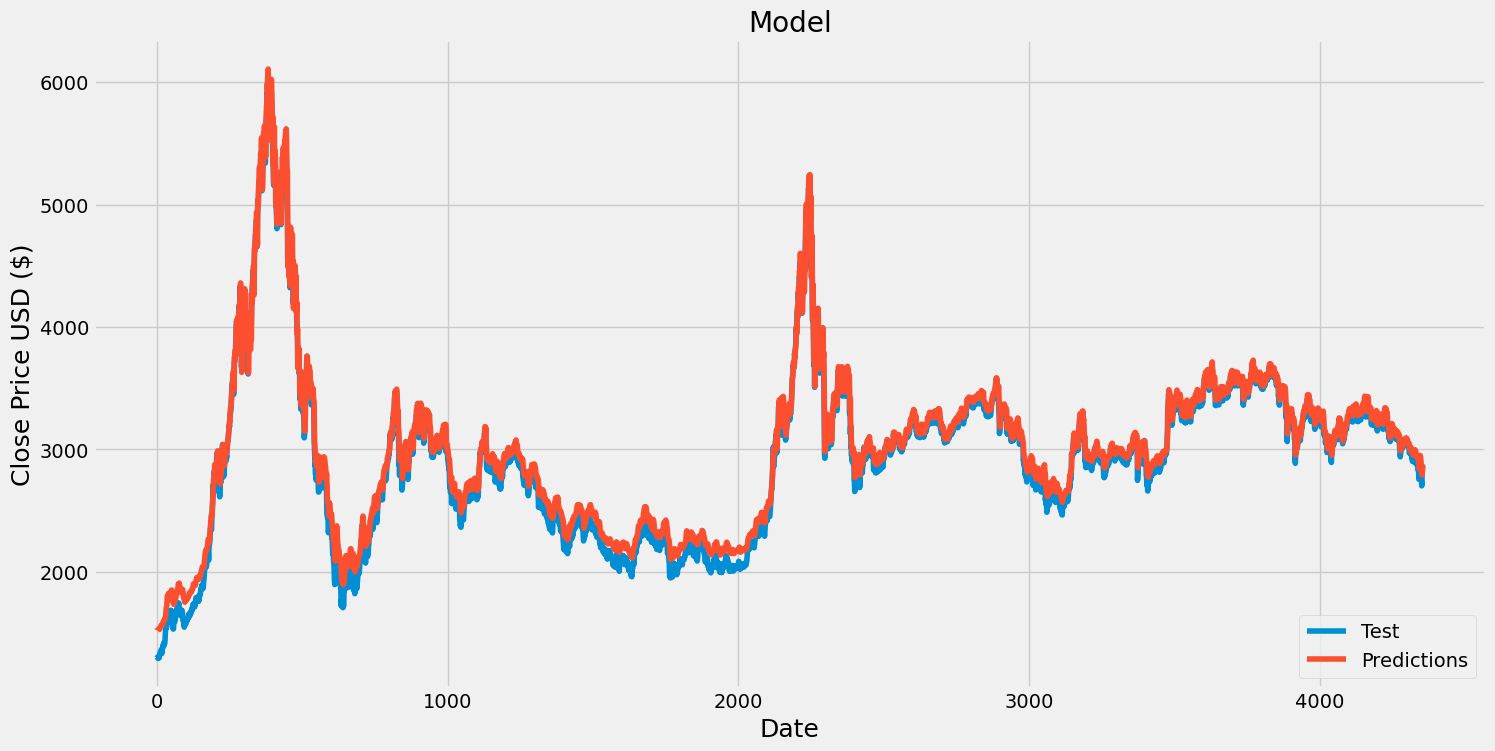

In [43]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test.values)
plt.plot(predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc = 'lower right')

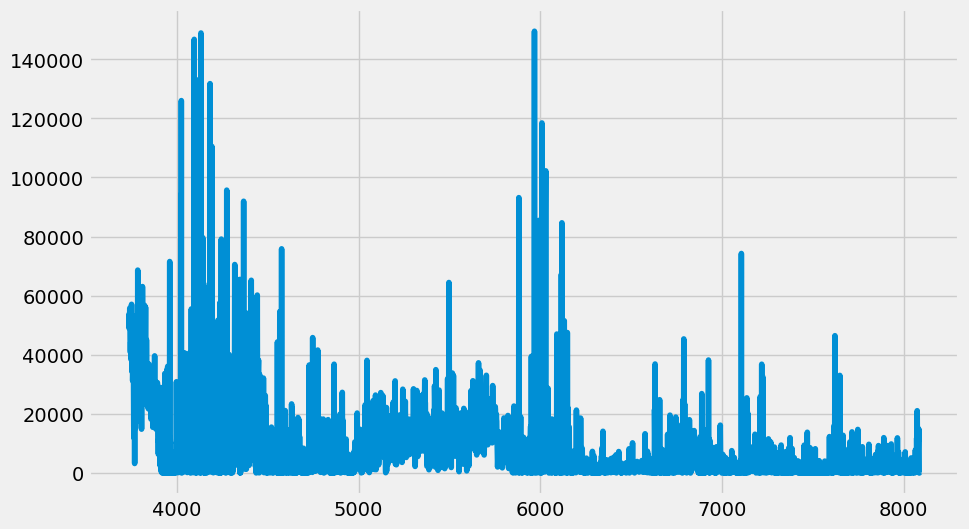

In [44]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

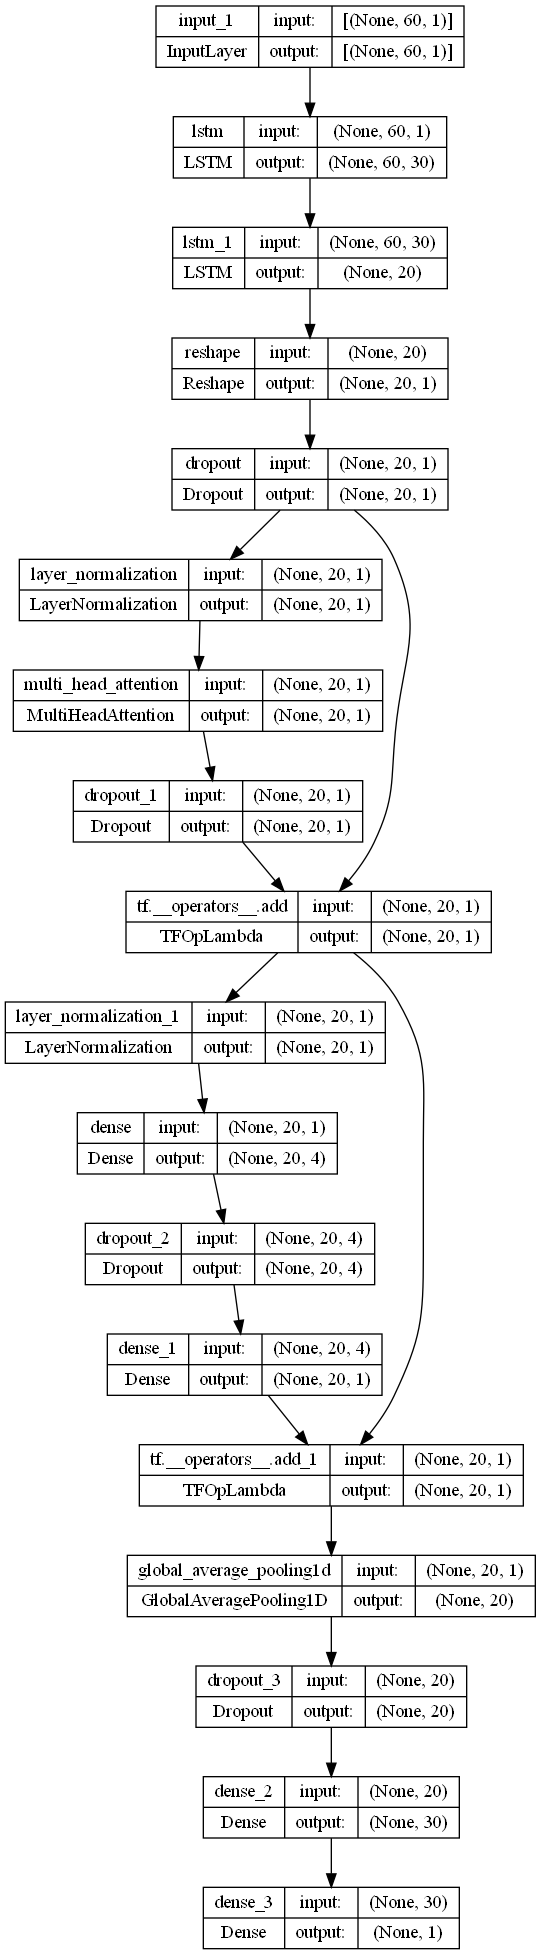

In [16]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [18]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 45.0/45.0 kB 445.0 kB/s eta 0:00:00


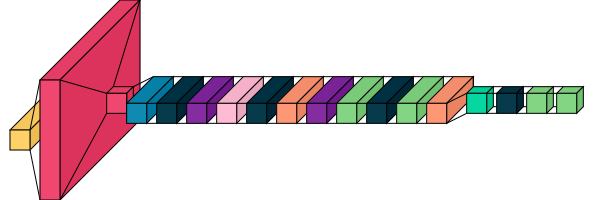

In [19]:
import visualkeras

#model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [34]:
import torch
from torchviz import make_dot

# create some sample input data
x = torch.randn(1, 3, 256, 256)

# generate predictions for the sample data
y = MyPyTorchModel()(x)

# generate a model architecture visualization
make_dot(y.mean(),
         params=dict(MyPyTorchModel().named_parameters()),
         show_attrs=True,
         show_saved=True).render("MyPyTorchModel_torchviz", format="png")

ModuleNotFoundError: No module named 'torchviz'

In [32]:
!pip install neutron

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 4.3/4.3 MB 626.1 kB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 655.0 kB/s eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 295.5/295.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 289.3/289.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 75.8/75.8 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 129.5/129.5 kB ? eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 112.9/112.9 kB 3.2 MB/s eta 0:00:00
     ------------------------------------ 107.5/107.5 kB 568.8 kB/s eta 0:00:00
     -------------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsDeprecationWarning: The license_file parameter is deprecated, use license_files instead.
    warnings.warn(msg, warning_class)
  running bdist_wheel
  running build
  running build_ext
  building 'netifaces' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for netifaces
  error: subprocess-exited-with-error
  
  Running setup.py install for netifaces did not run successfully.
  exit code: 1
  
  [9 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsD

In [33]:
import neutron
neutron.start('LSTM_attention_model1.keras')

ModuleNotFoundError: No module named 'neutron'